In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving agriculture csv.unknown to agriculture csv.unknown


In [14]:
df=pd.read_csv("agriculture csv.unknown")

In [17]:
df.head(10)


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000
5,Andaman and Nicobar,South Andaman,Port Blair,Bottle gourd,Other,04/03/2019,3000,4000,3500
6,Andaman and Nicobar,South Andaman,Port Blair,Brinjal,Other,04/03/2019,7000,8000,7500
7,Andaman and Nicobar,South Andaman,Port Blair,Cabbage,Other,04/03/2019,6000,7000,6500
8,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,04/03/2019,9000,11000,10000
9,Andaman and Nicobar,South Andaman,Port Blair,Cauliflower,Other,04/03/2019,10000,12000,11000


In [18]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')
df = df.dropna(subset=['state', 'commodity', 'modal_price'])

In [19]:
df.head(10)

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,2019-04-03,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,2019-04-03,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2019-04-03,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,2019-04-03,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,2019-04-03,110000,130000,120000
5,Andaman and Nicobar,South Andaman,Port Blair,Bottle gourd,Other,2019-04-03,3000,4000,3500
6,Andaman and Nicobar,South Andaman,Port Blair,Brinjal,Other,2019-04-03,7000,8000,7500
7,Andaman and Nicobar,South Andaman,Port Blair,Cabbage,Other,2019-04-03,6000,7000,6500
8,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,2019-04-03,9000,11000,10000
9,Andaman and Nicobar,South Andaman,Port Blair,Cauliflower,Other,2019-04-03,10000,12000,11000


In [20]:
state_avg_price = df.groupby('state')['modal_price'].mean().sort_values(ascending=False).head(5)

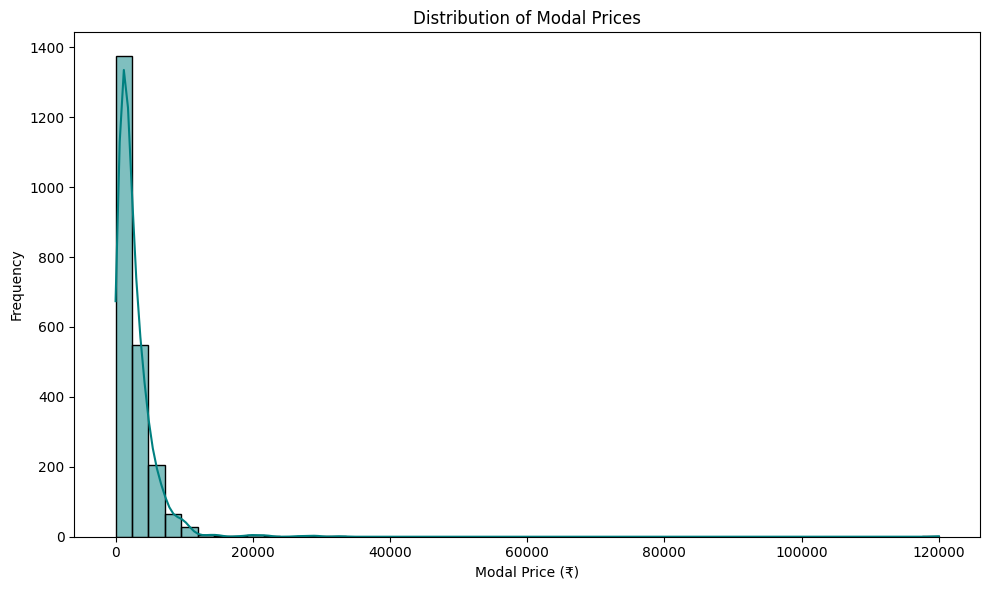

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['modal_price'], bins=50, kde=True, color='teal')
plt.title('Distribution of Modal Prices')
plt.xlabel('Modal Price (₹)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('price_distribution.png')


In [32]:
plt.close()

In [22]:
commodity_count = df.groupby('state')['commodity'].nunique().sort_values(ascending=False)

/tmp/ipython-input-33-396494184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=commodity_count.values, y=commodity_count.index, palette='coolwarm')


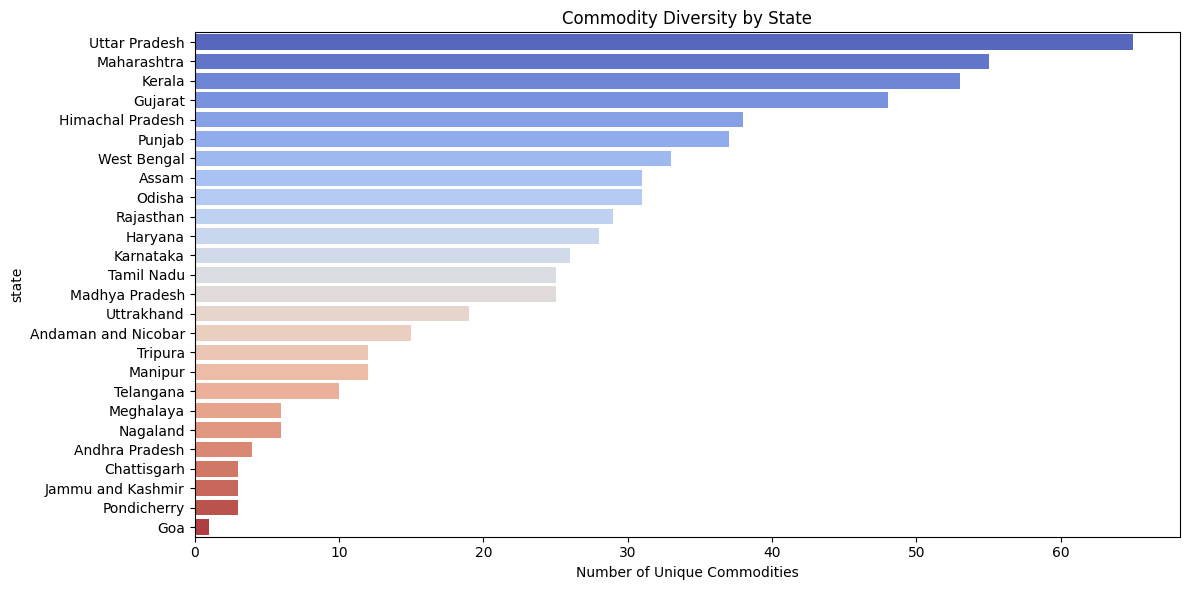

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x=commodity_count.values, y=commodity_count.index, palette='coolwarm')
plt.xlabel('Number of Unique Commodities')
plt.title('Commodity Diversity by State')
plt.tight_layout()
plt.savefig('commodity_diversity.png')

In [34]:
plt.close()

In [25]:
state_summary = df.groupby('state').agg({
    'modal_price': 'mean',
    'commodity': pd.Series.nunique
}).rename(columns={'commodity': 'unique_commodities'}).reset_index()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(state_summary[['modal_price', 'unique_commodities']])

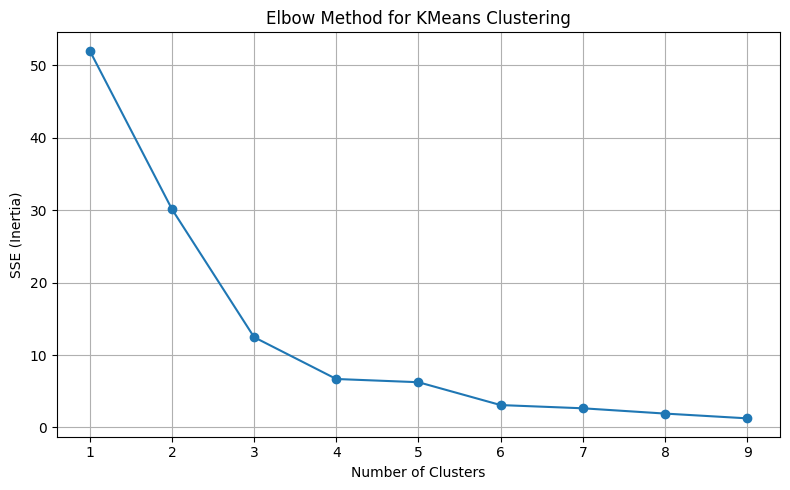

In [35]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for KMeans Clustering')
plt.grid(True)
plt.tight_layout()
plt.savefig('elbow_chart.png')

In [36]:
plt.close()

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
state_summary['cluster'] = kmeans.fit_predict(X_scaled)

In [38]:
print(state_summary.head())

                 state   modal_price  unique_commodities  cluster
0  Andaman and Nicobar  14073.333333                  15        2
1       Andhra Pradesh   1698.571429                   4        1
2                Assam   2571.896552                  31        0
3          Chattisgarh   2720.000000                   3        1
4                  Goa  20750.000000                   1        2
